In [152]:
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as LogNorm
import matplotlib.ticker as ticker
import math

In [153]:
tfile_hist = [f'../histograms/analysis_note/theta_phi_{i}.root' for i in [10.2, 10.4, 10.6] ]
tfile_func = [f'../data/acceptance_map/acceptanceMap_{i}.root' for i in [10.2, 10.4, 10.6] ]
par_list = ['e', 'pip', 'pim']
par_tit = ['e', r'{\pi^+}', r'{\pi^-}']
hBase = 'hThetaPhi_sec'
fBase = 'fThetaPhi_sec'
vBase = 'fitBounds_sec'

In [154]:
def eval_lower(par, params, xVal):
    if par == 'e':
    	return params[0]*(xVal - params[1])**2 + params[2]
    else:
    	return params[0]*(xVal - params[1])**4 + params[2]

In [155]:
def make_plot( par, ax, h, f, b): 
    values = h.values()            
    values[values == 0] = np.nan
    xEdges = h.axis(0).edges()
    yEdges = h.axis(1).edges()
    values = np.reshape( values, (len(xEdges) - 1, len(yEdges) - 1) )
    
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=7)
    ax.tick_params(which='minor', length=4)
    ax.pcolormesh(xEdges, yEdges, values.T, cmap='viridis', shading='auto')

    params = [f.GetParameter(j) for j in range(3)]
    phi = np.linspace( xEdges[0], xEdges[-1], 500 )
    theta = np.asarray( eval_lower( par, params, phi ) )

    ax.plot( phi, theta, color='r', linestyle='-' )

    left = bounds.X()
    right = bounds.Y()
    top = bounds.Z()

    ax.axvline(left, linestyle='-', color='r')
    ax.axvline(right, linestyle='-', color='r')
    ax.axhline(top, linestyle='-', color='r')
    
    ax.set_ylim(0, 45)
    ax.set_xlim( left - 10, right + 10 )

    return 

/var/folders/4d/9x90517x6q3cc4_sz1jrqlj00000gn/T/ipykernel_61355/248296896.py:25: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


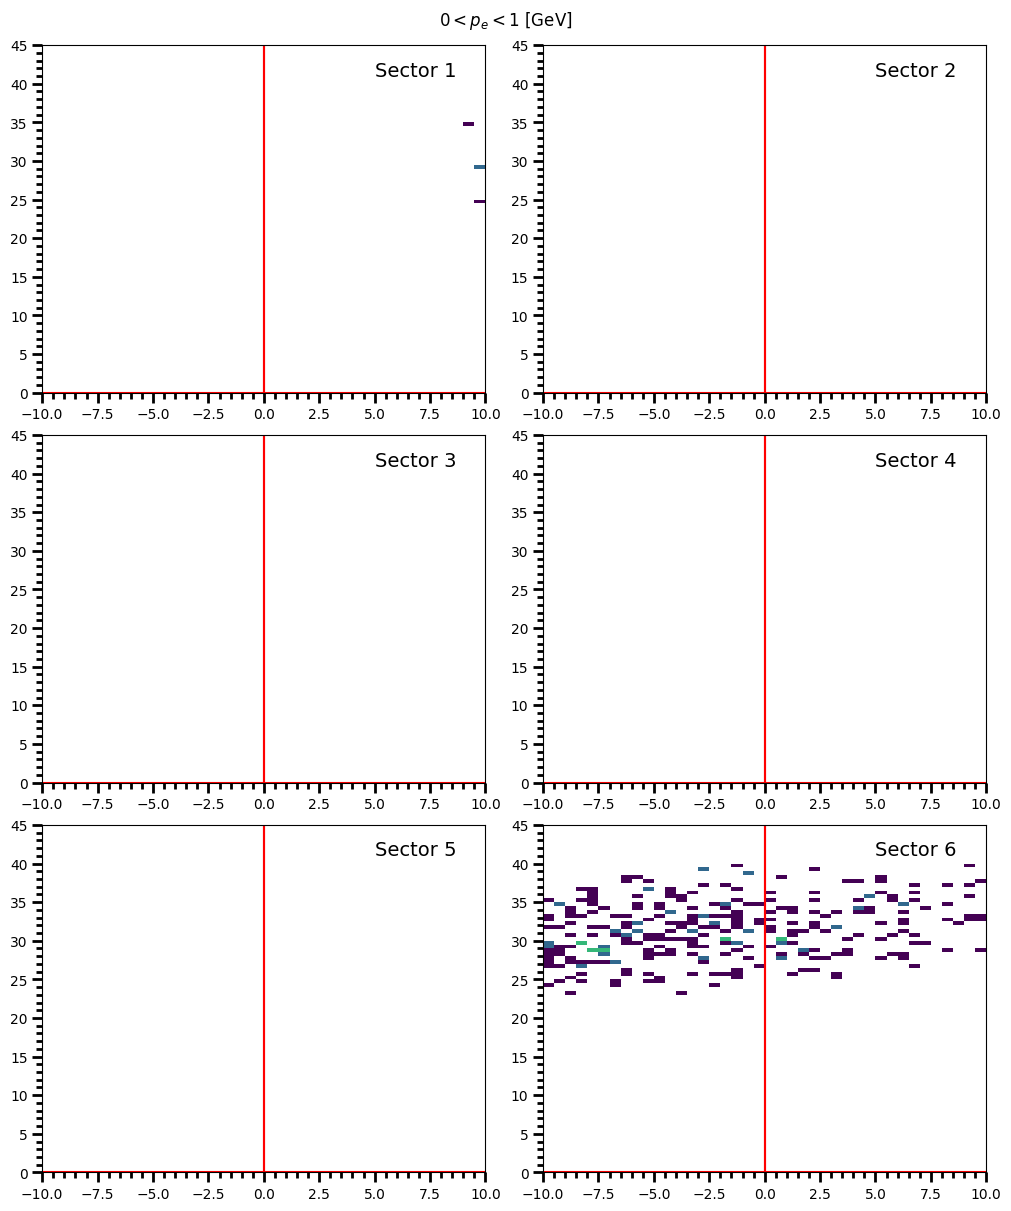

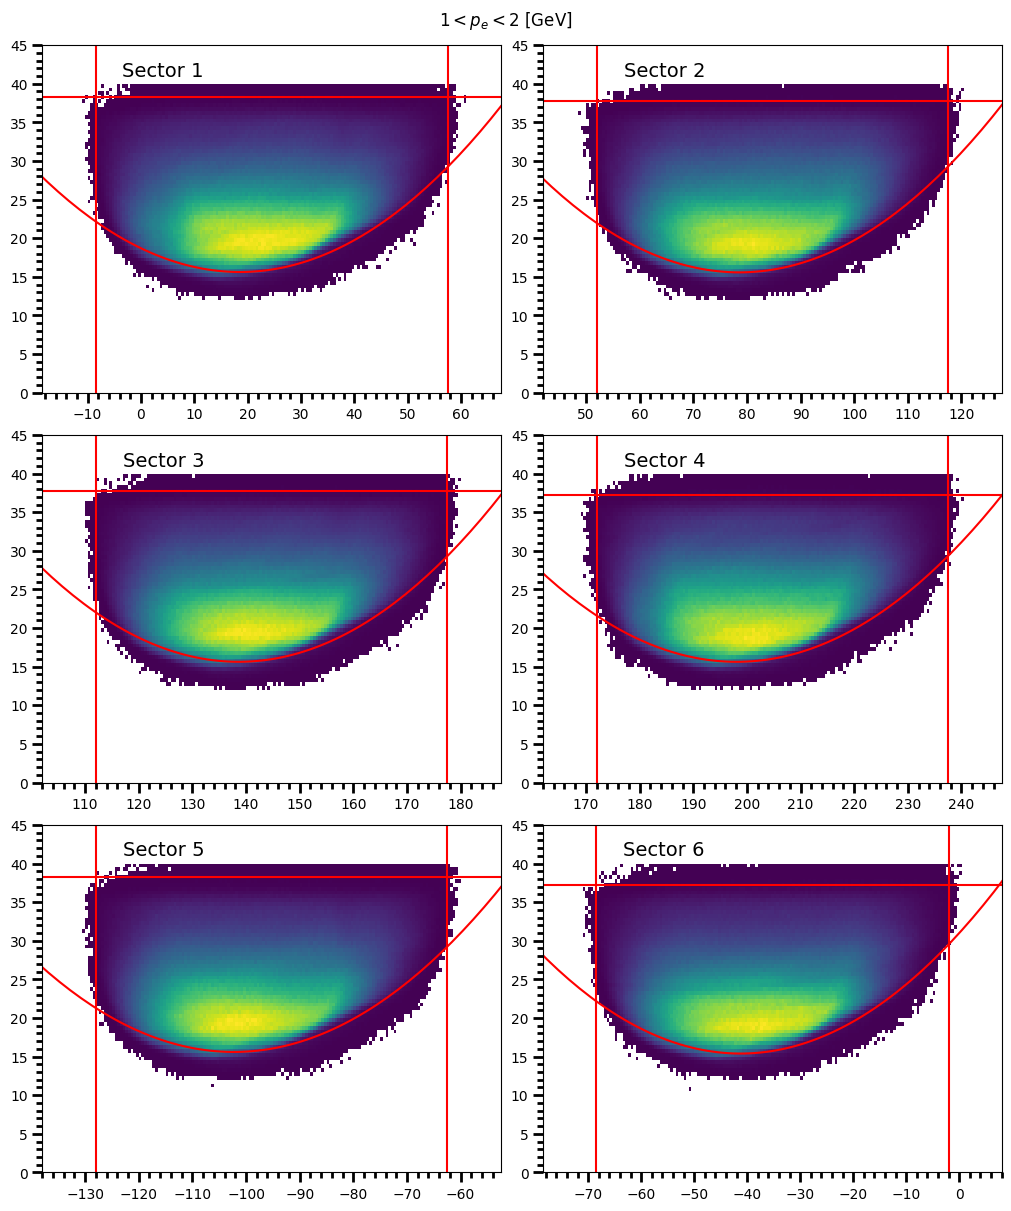

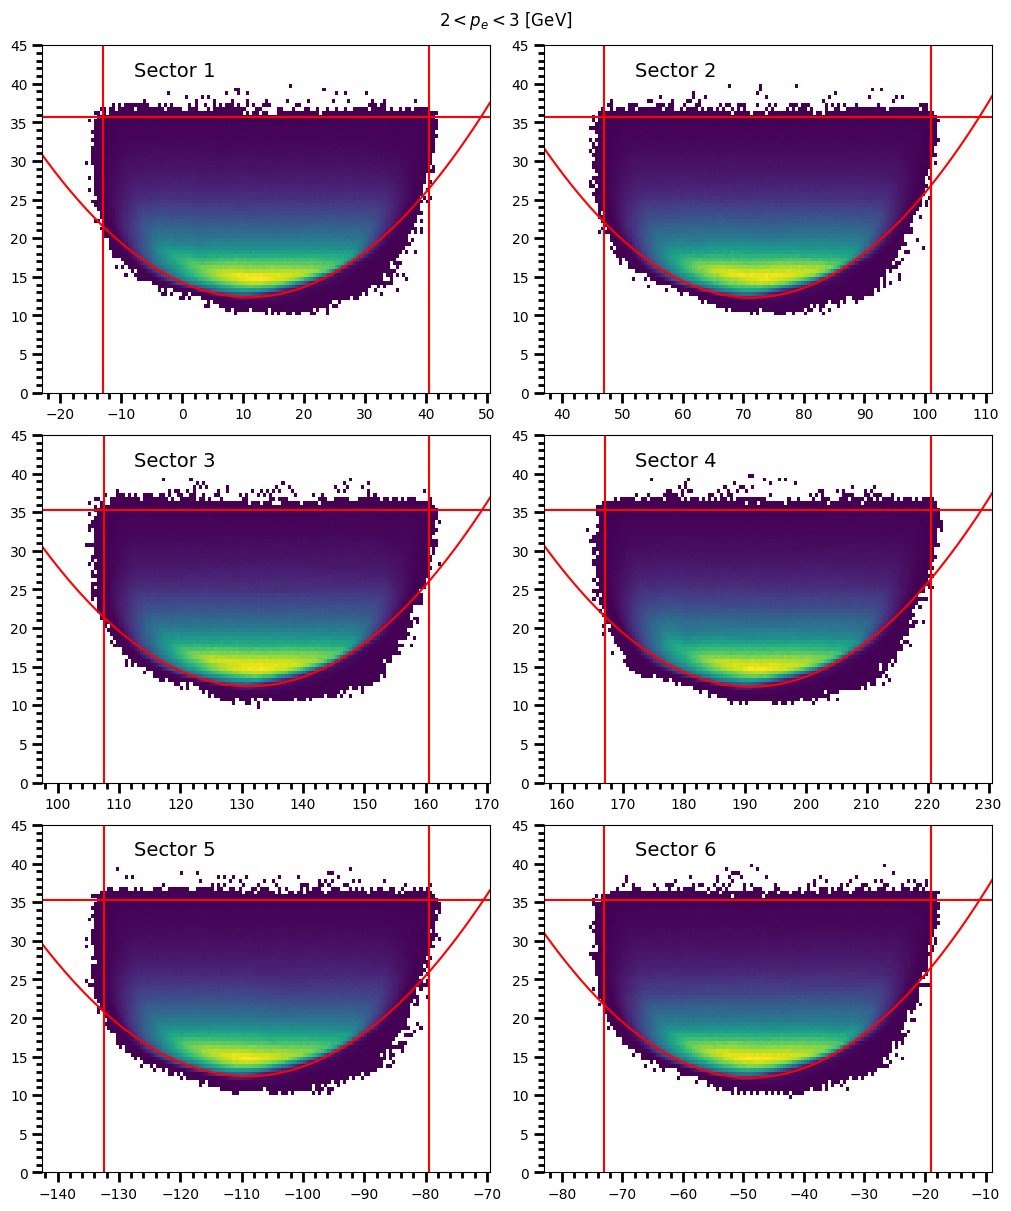

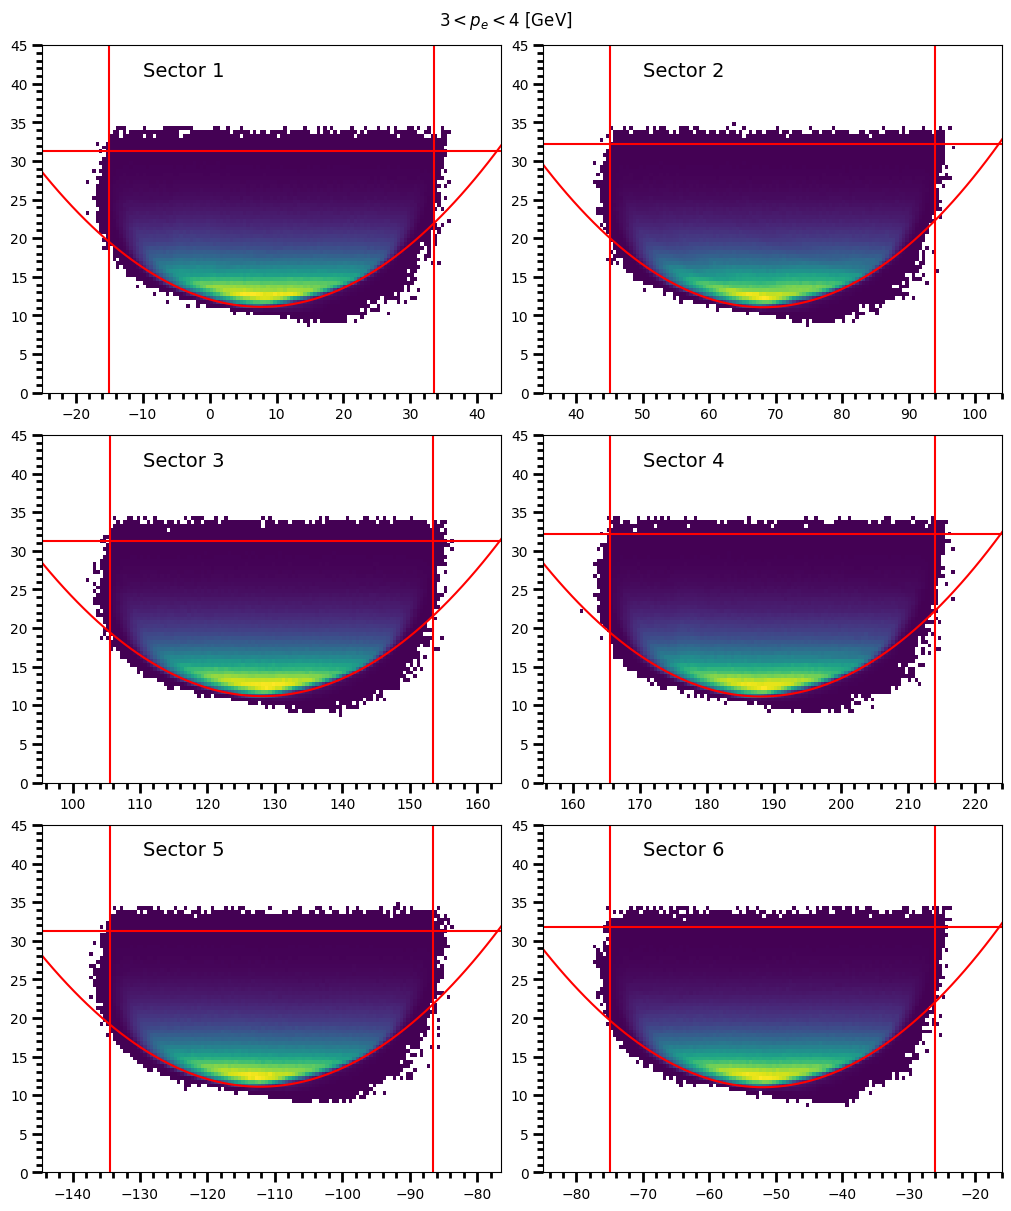

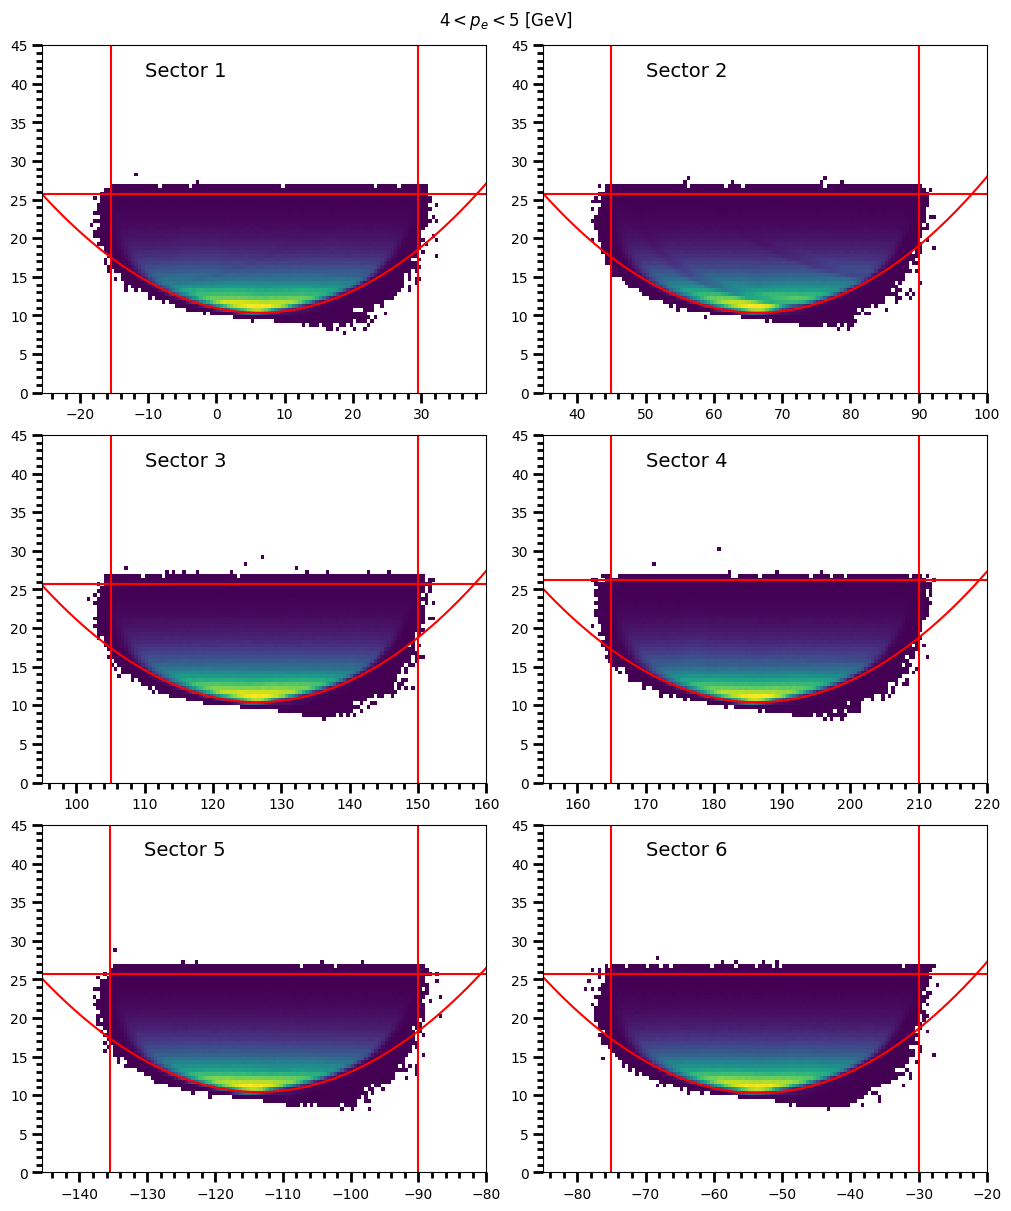

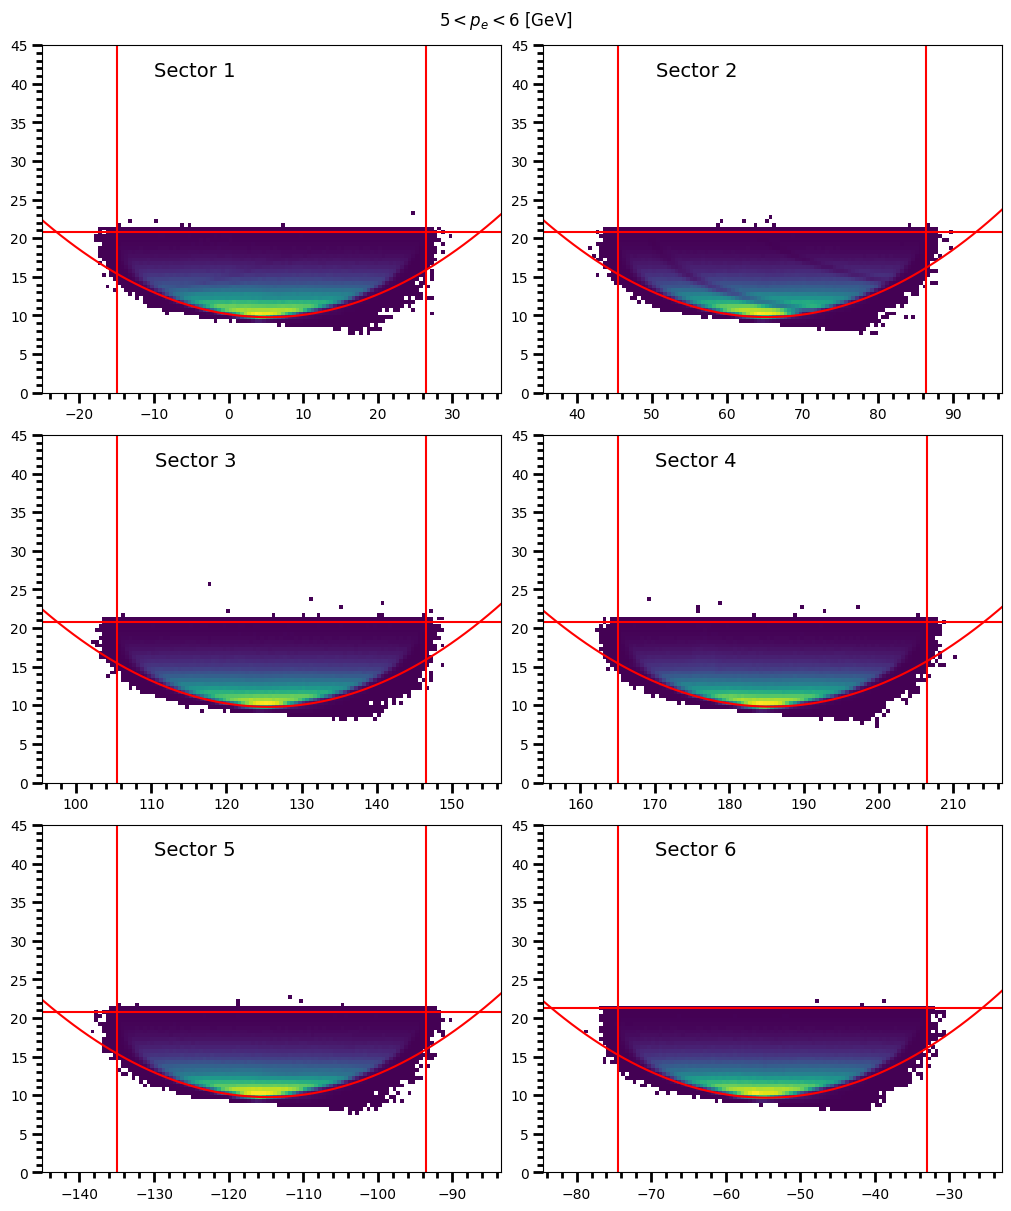

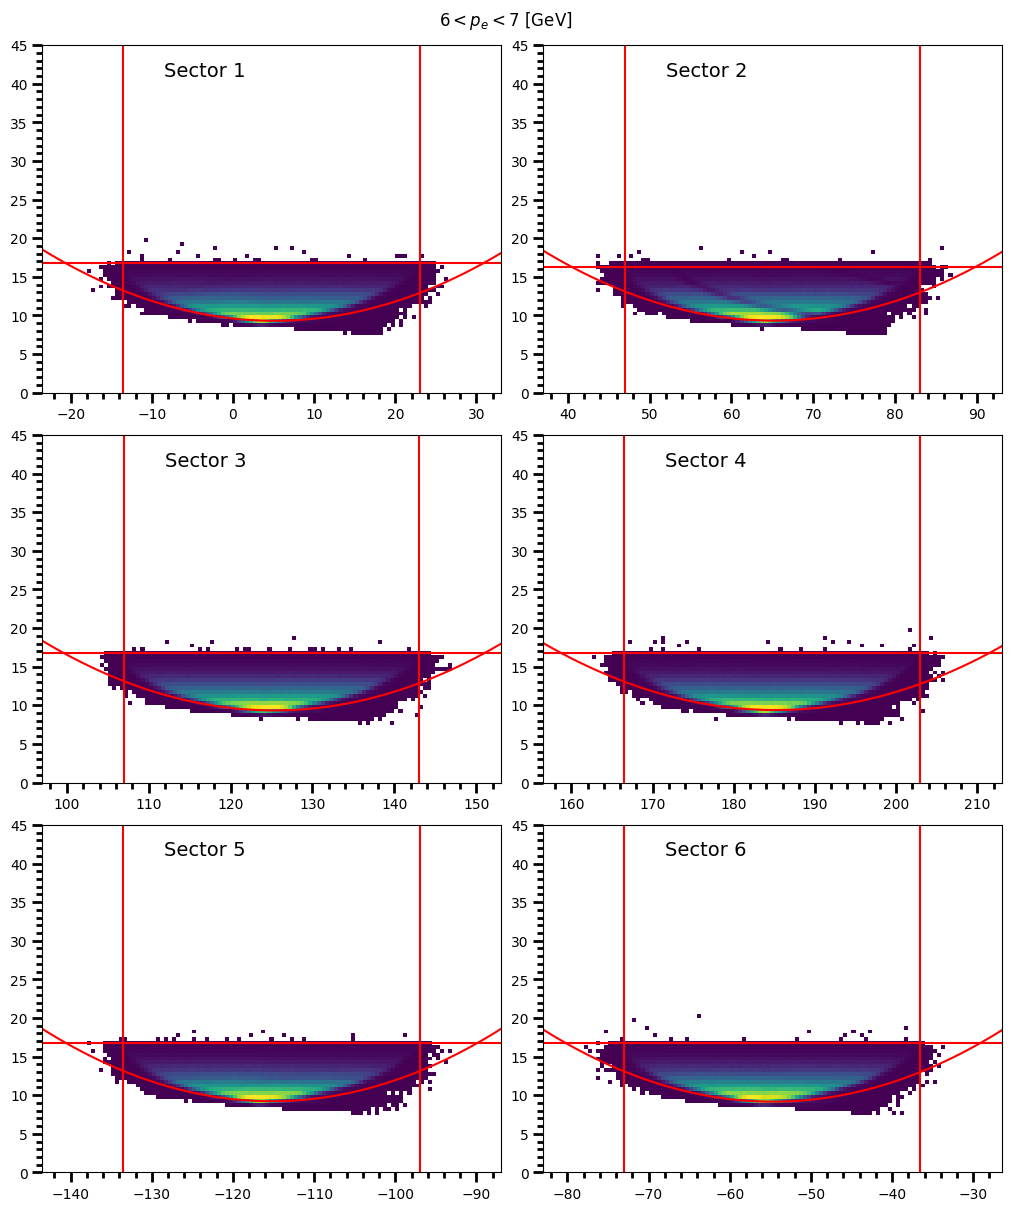

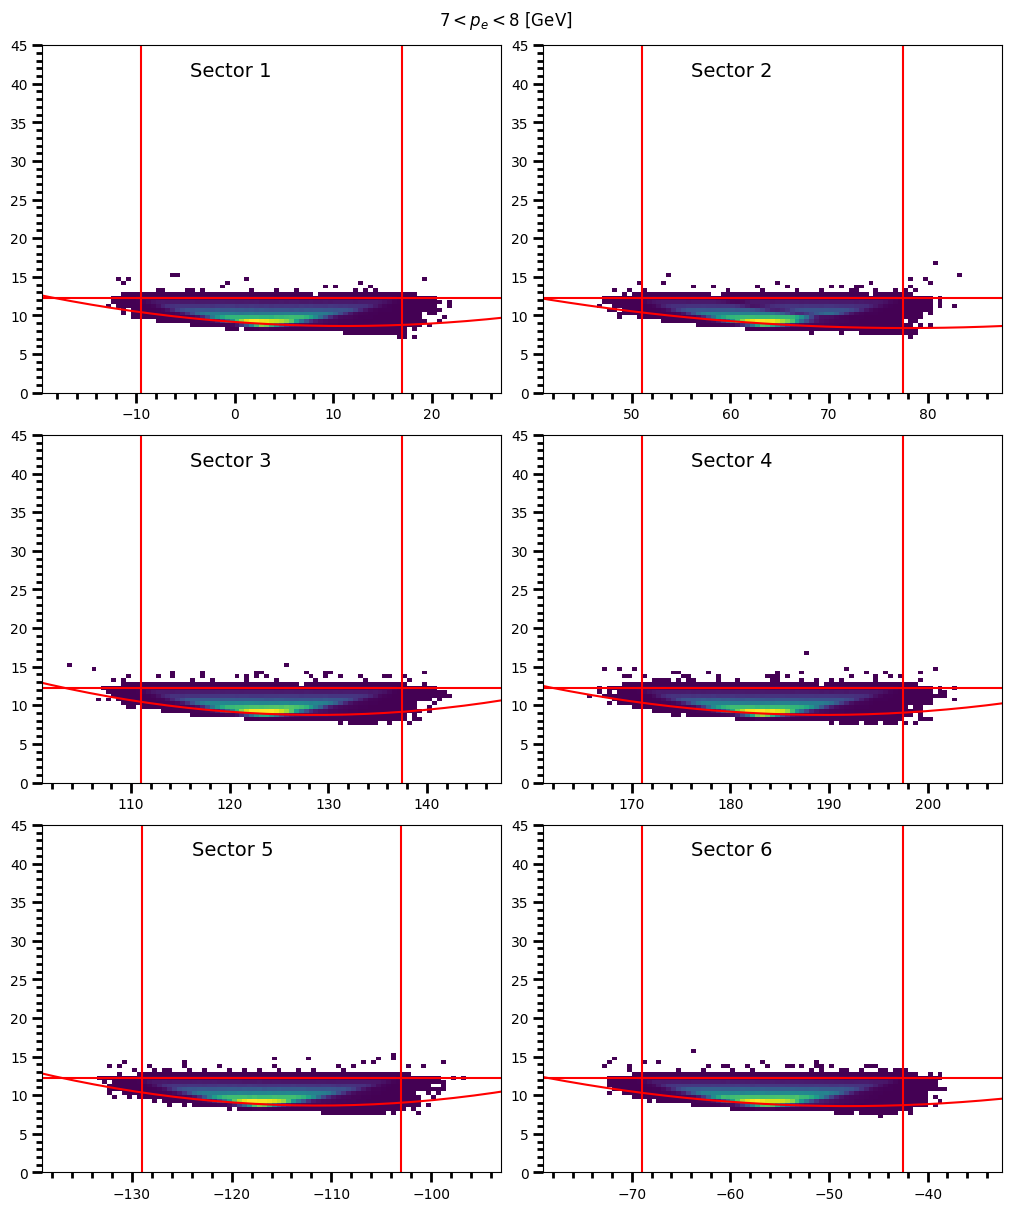

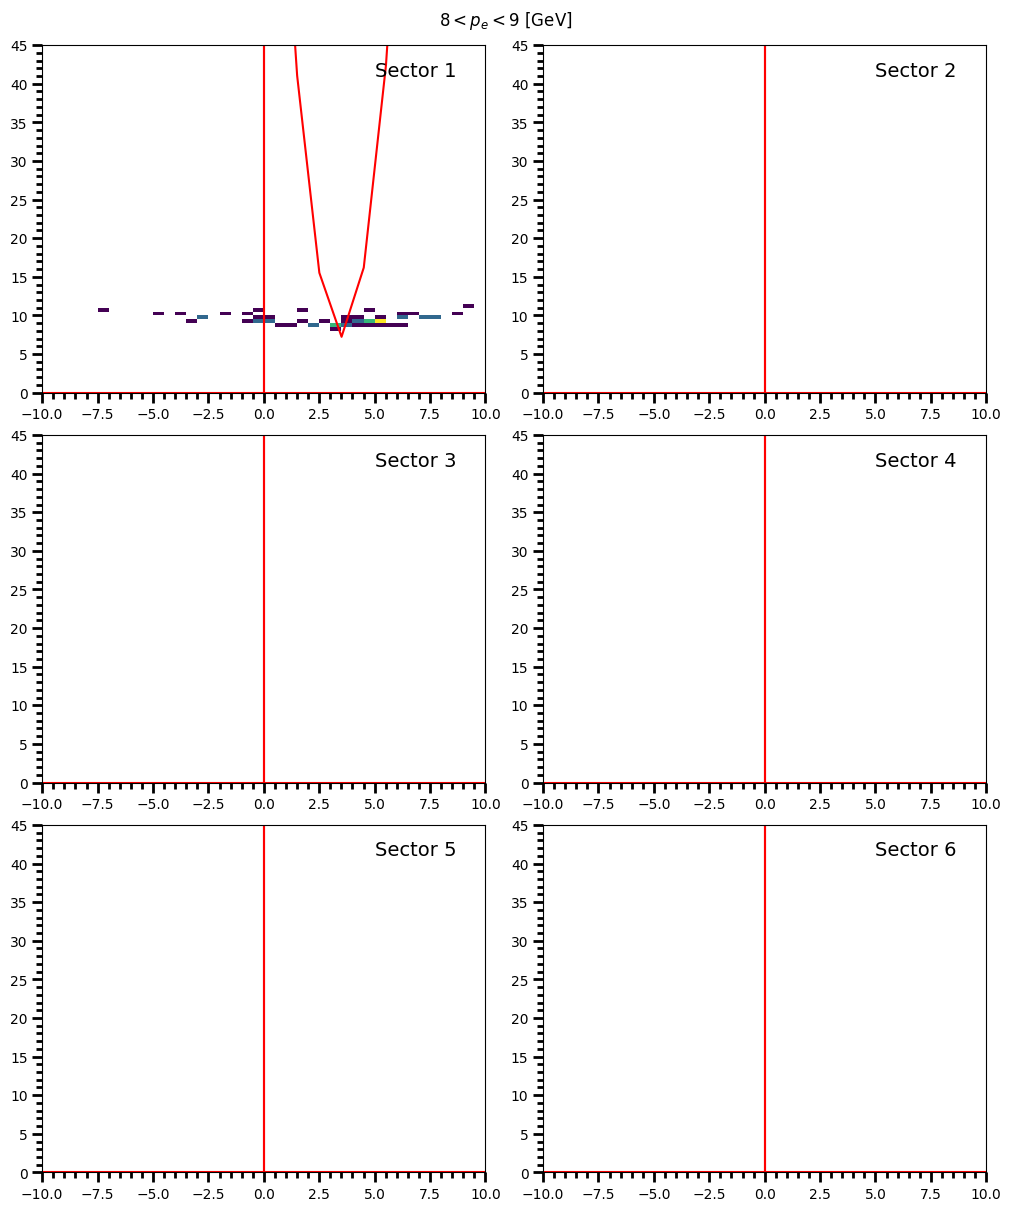

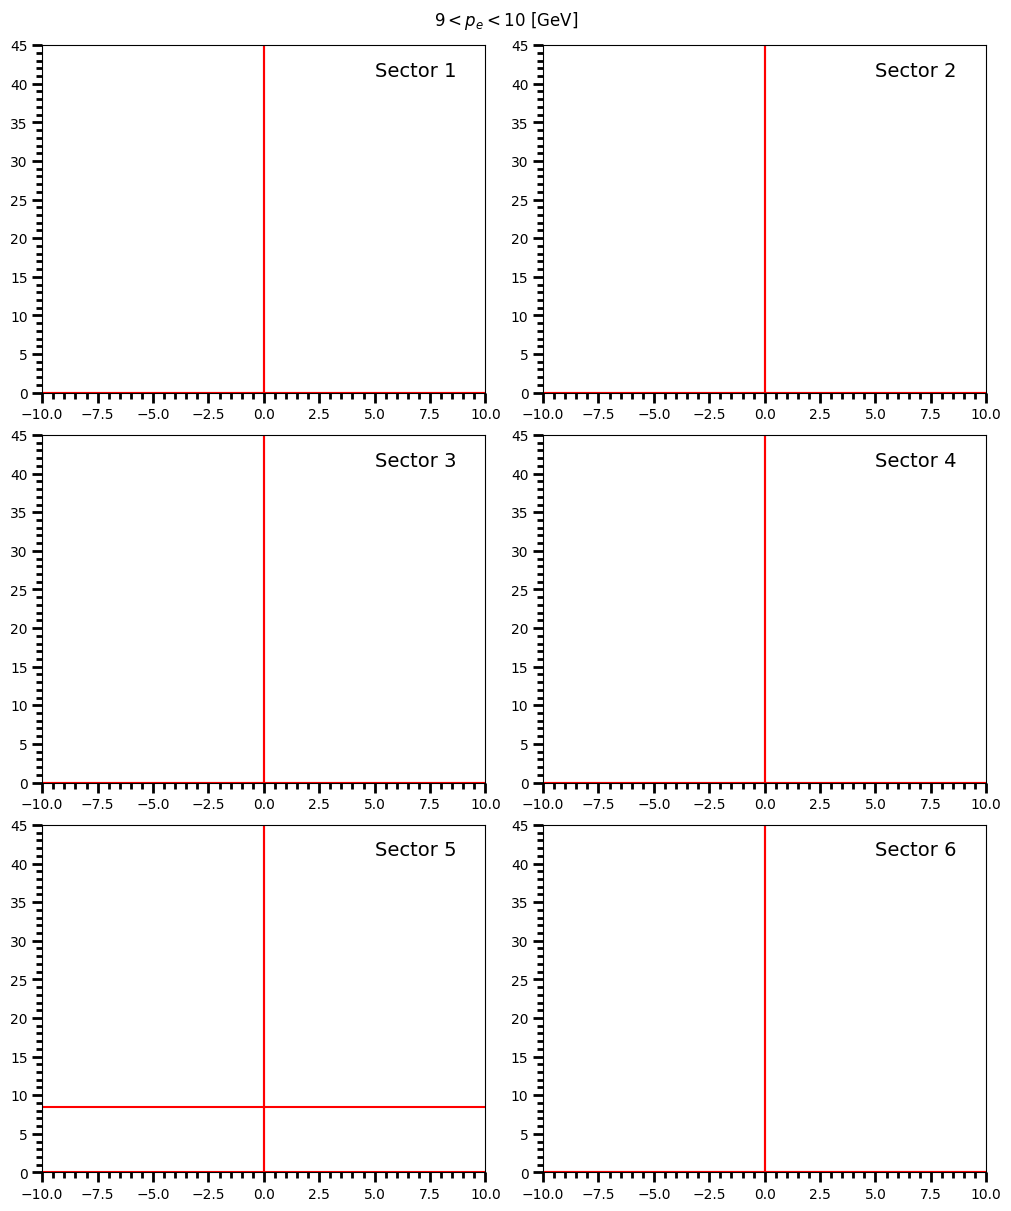

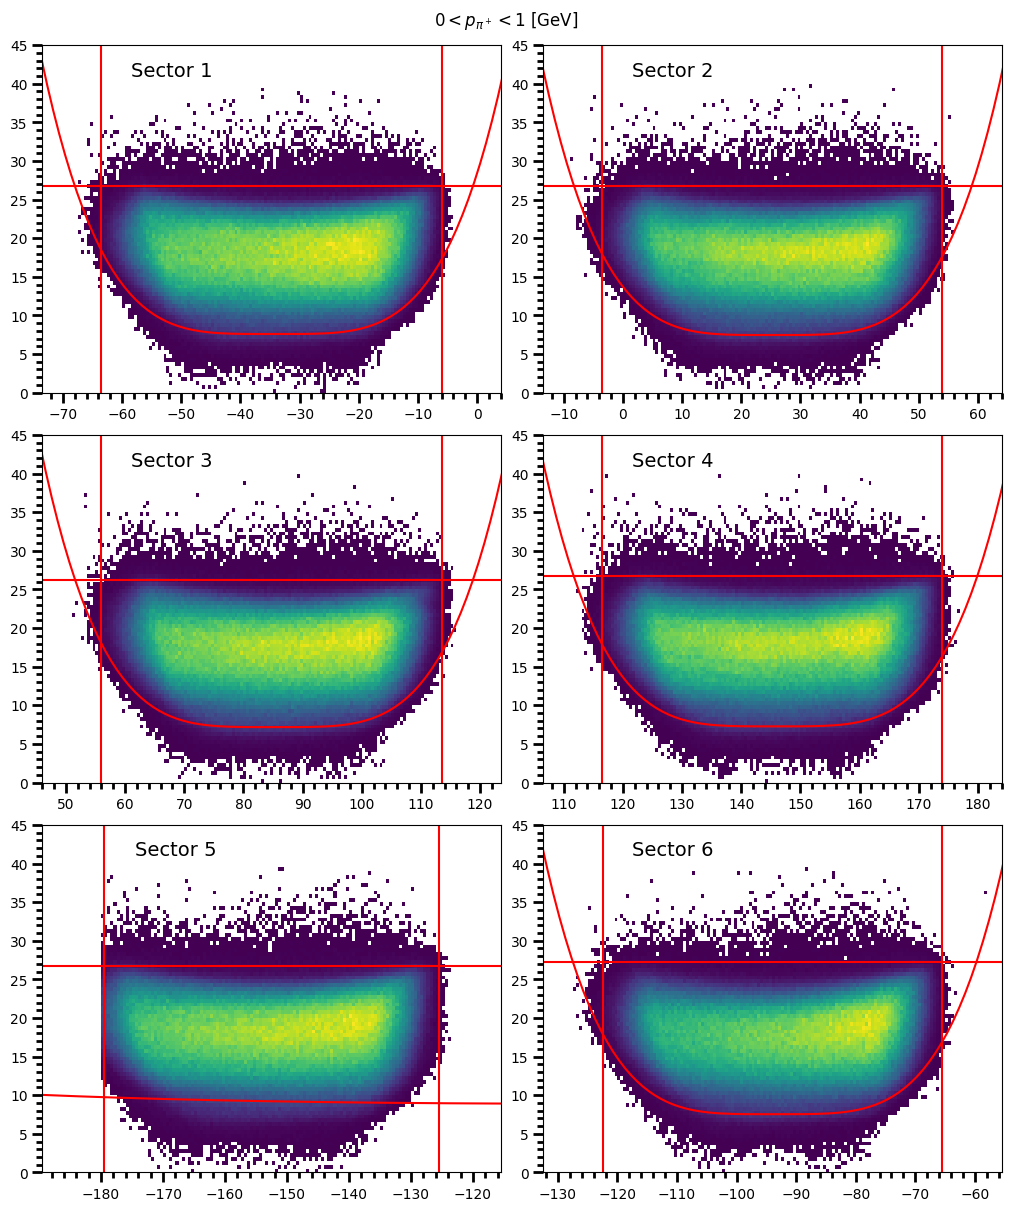

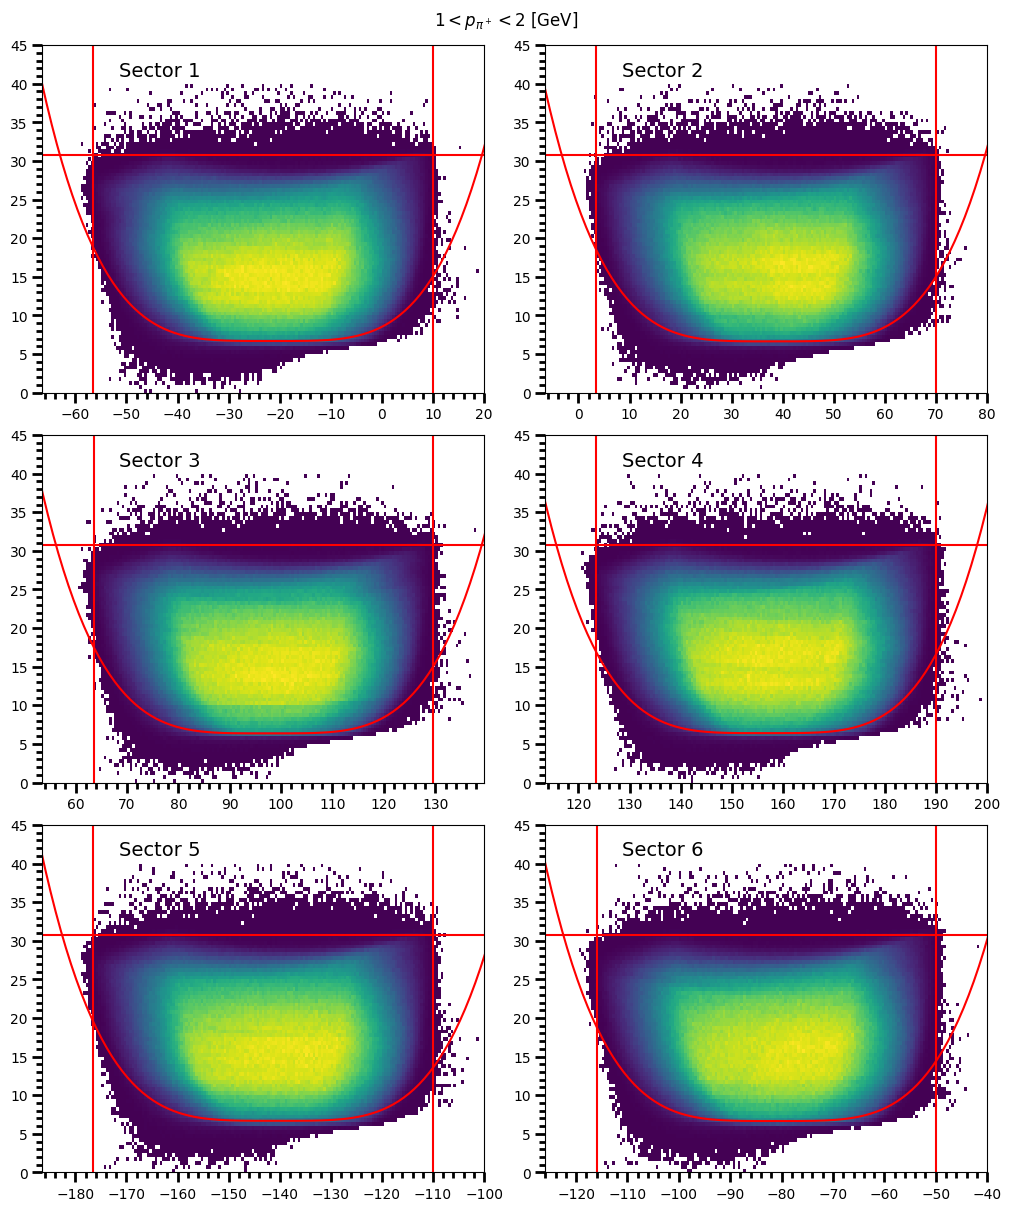

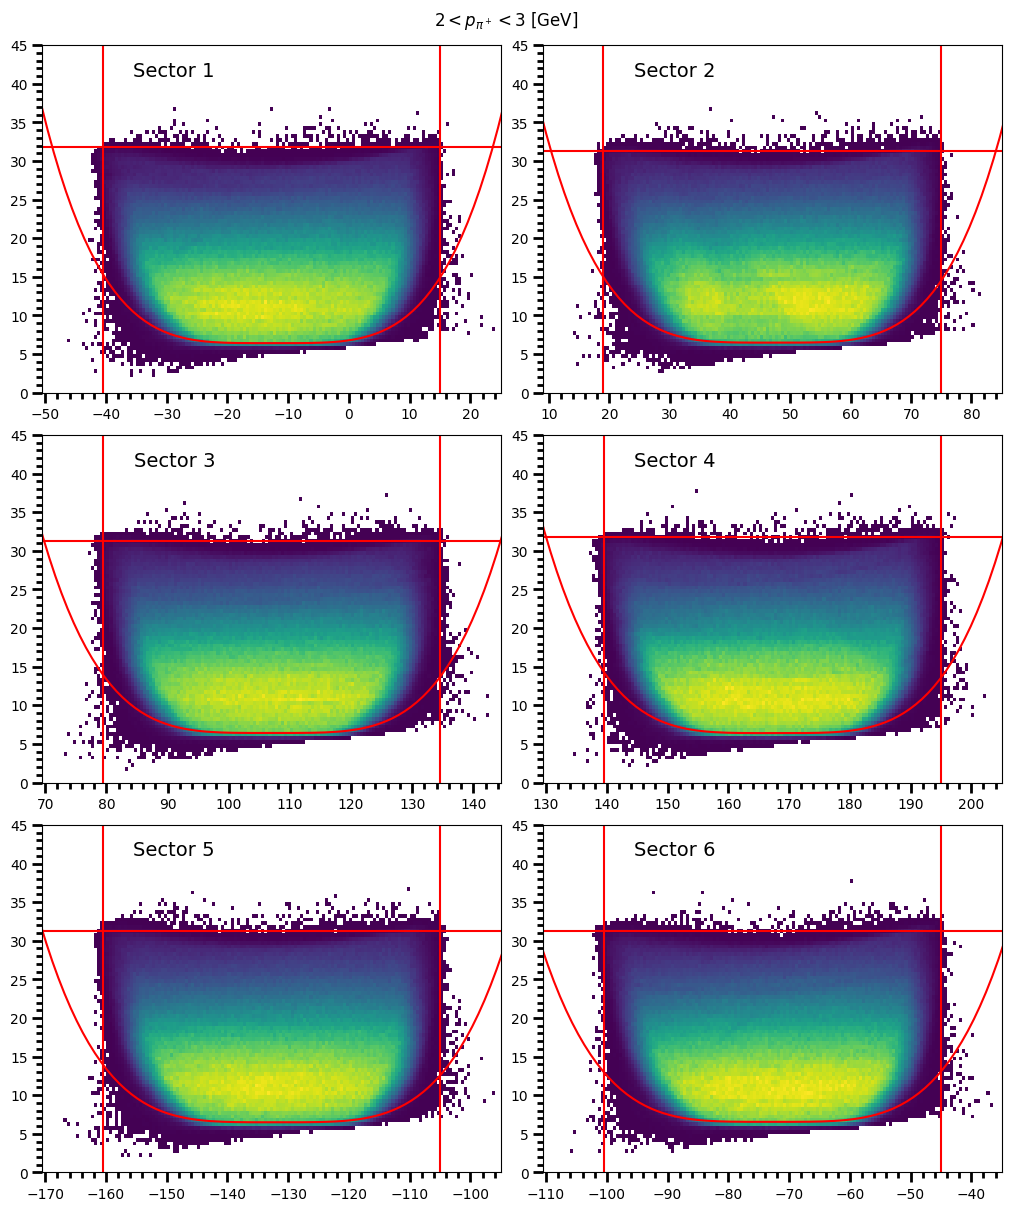

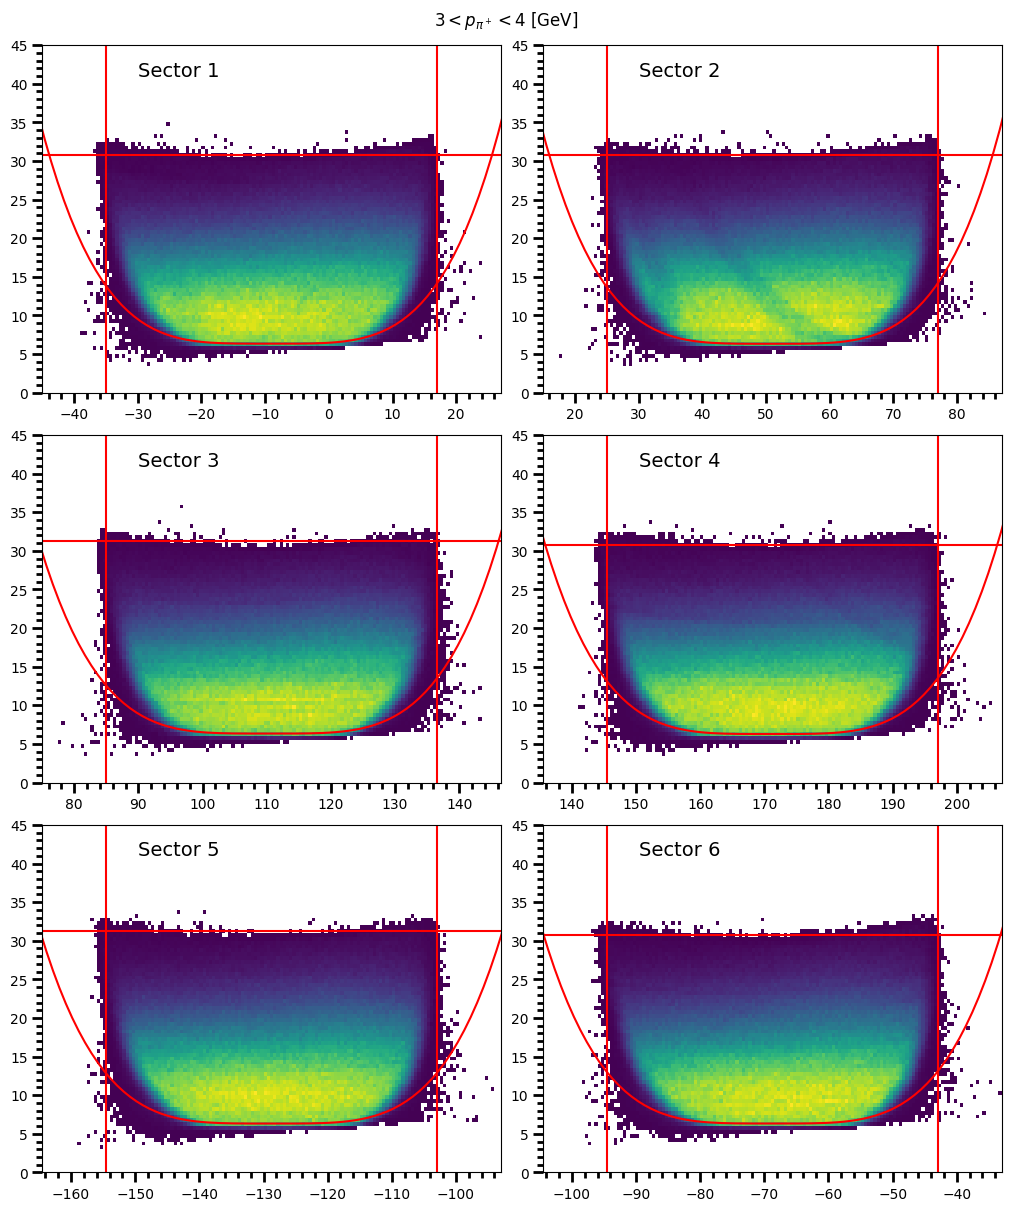

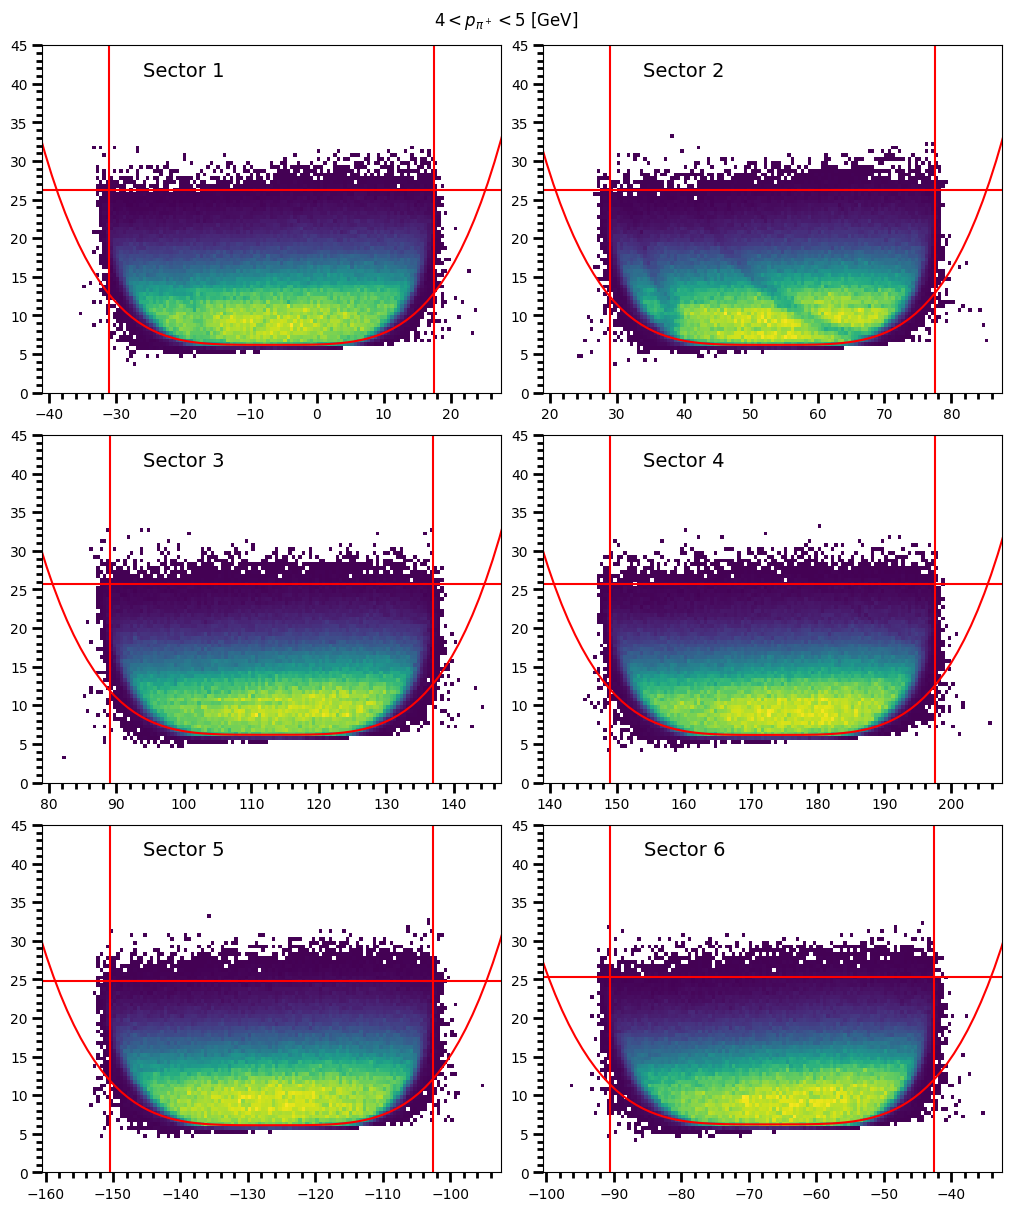

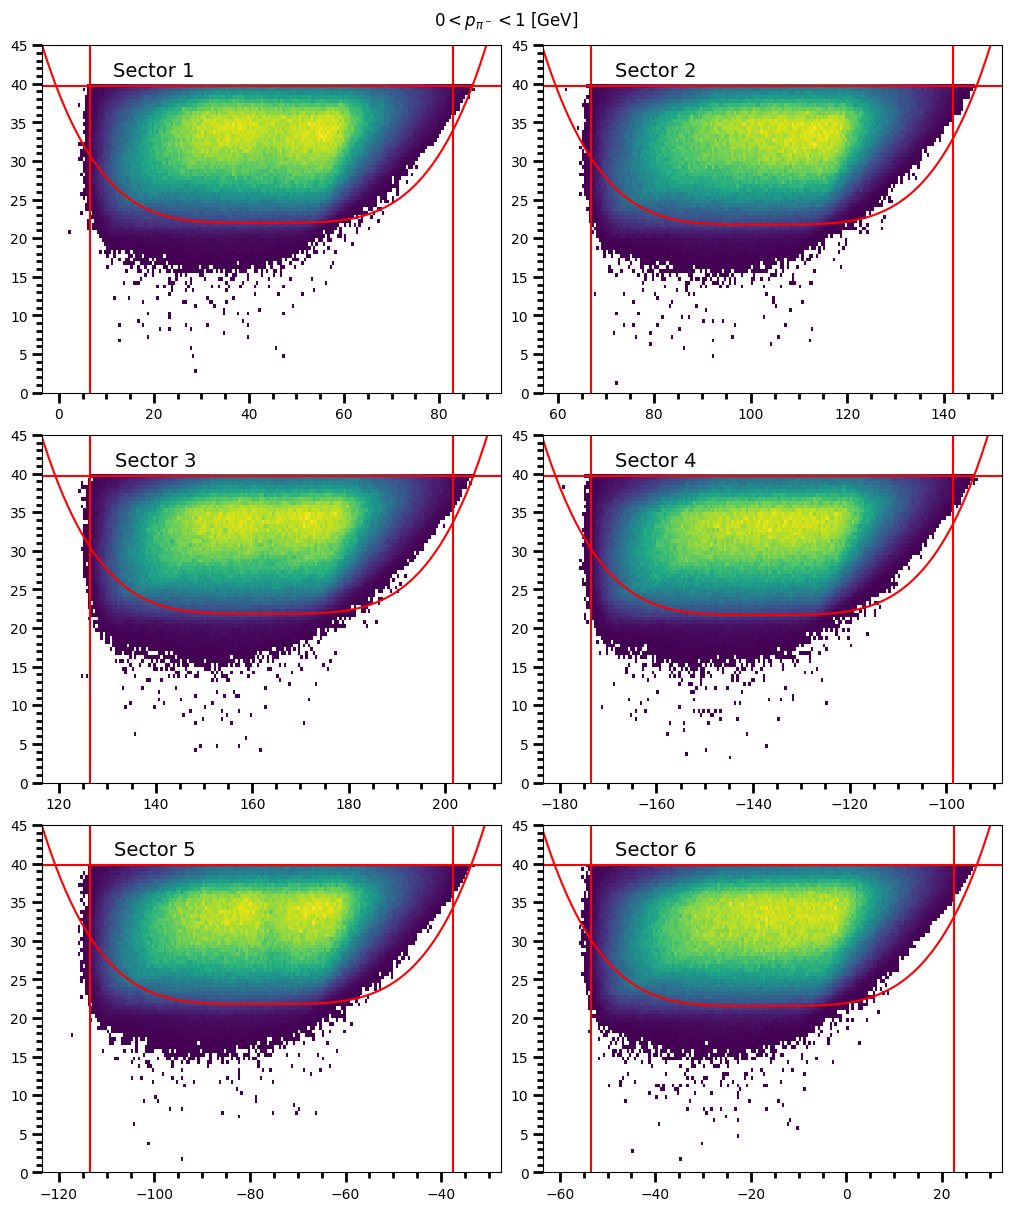

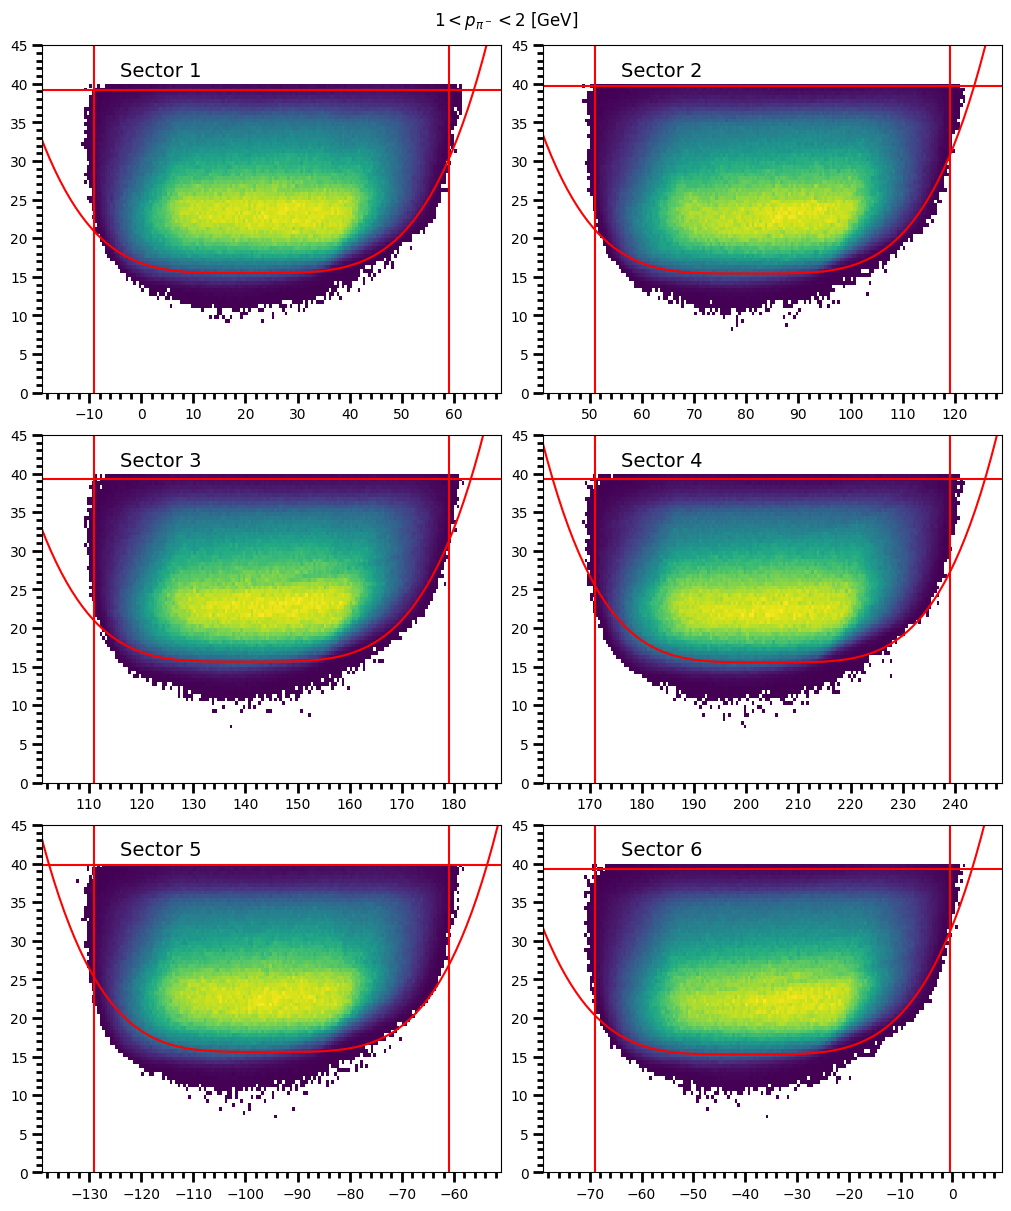

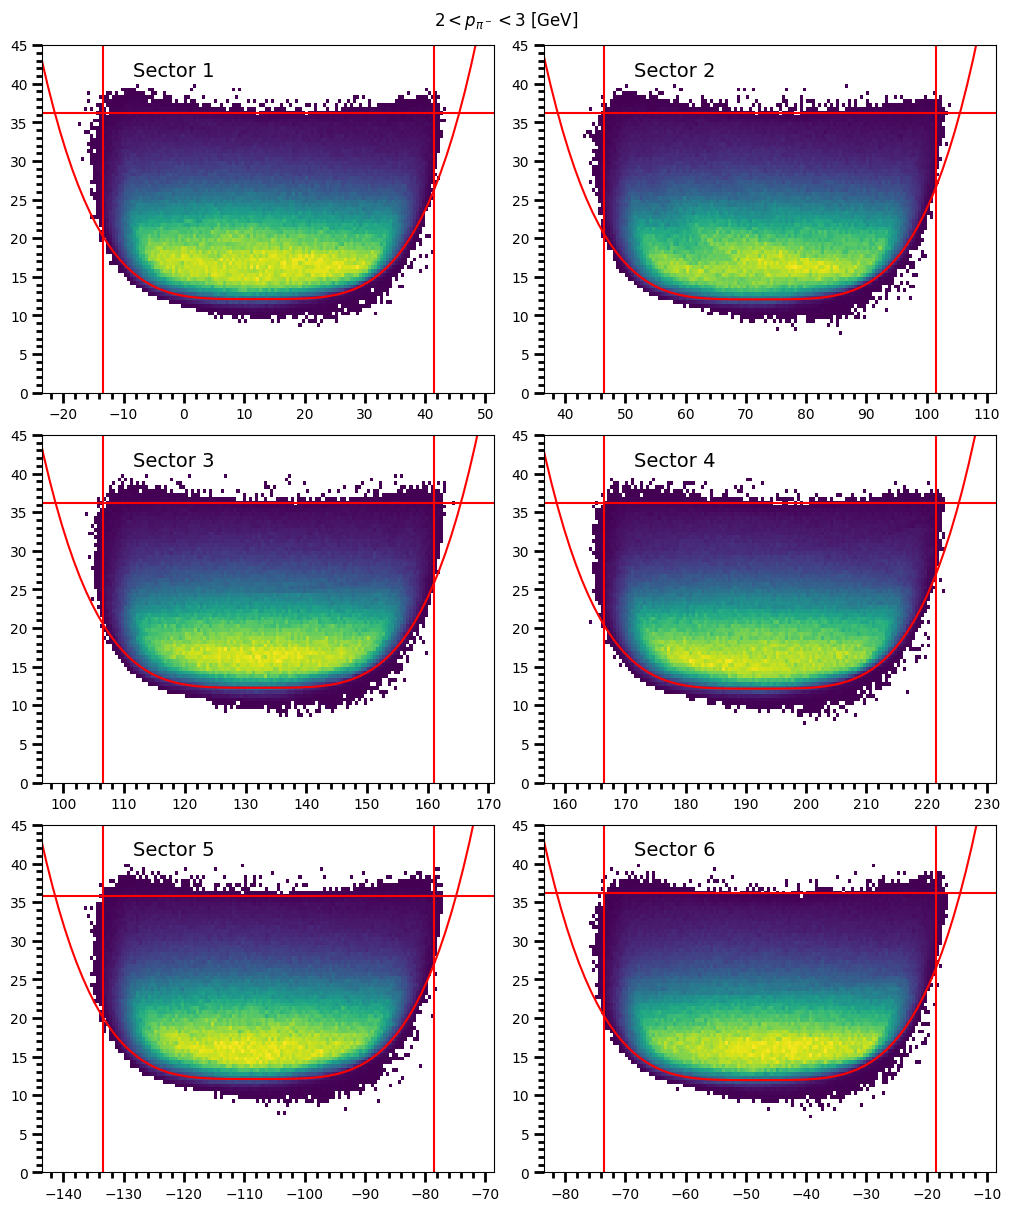

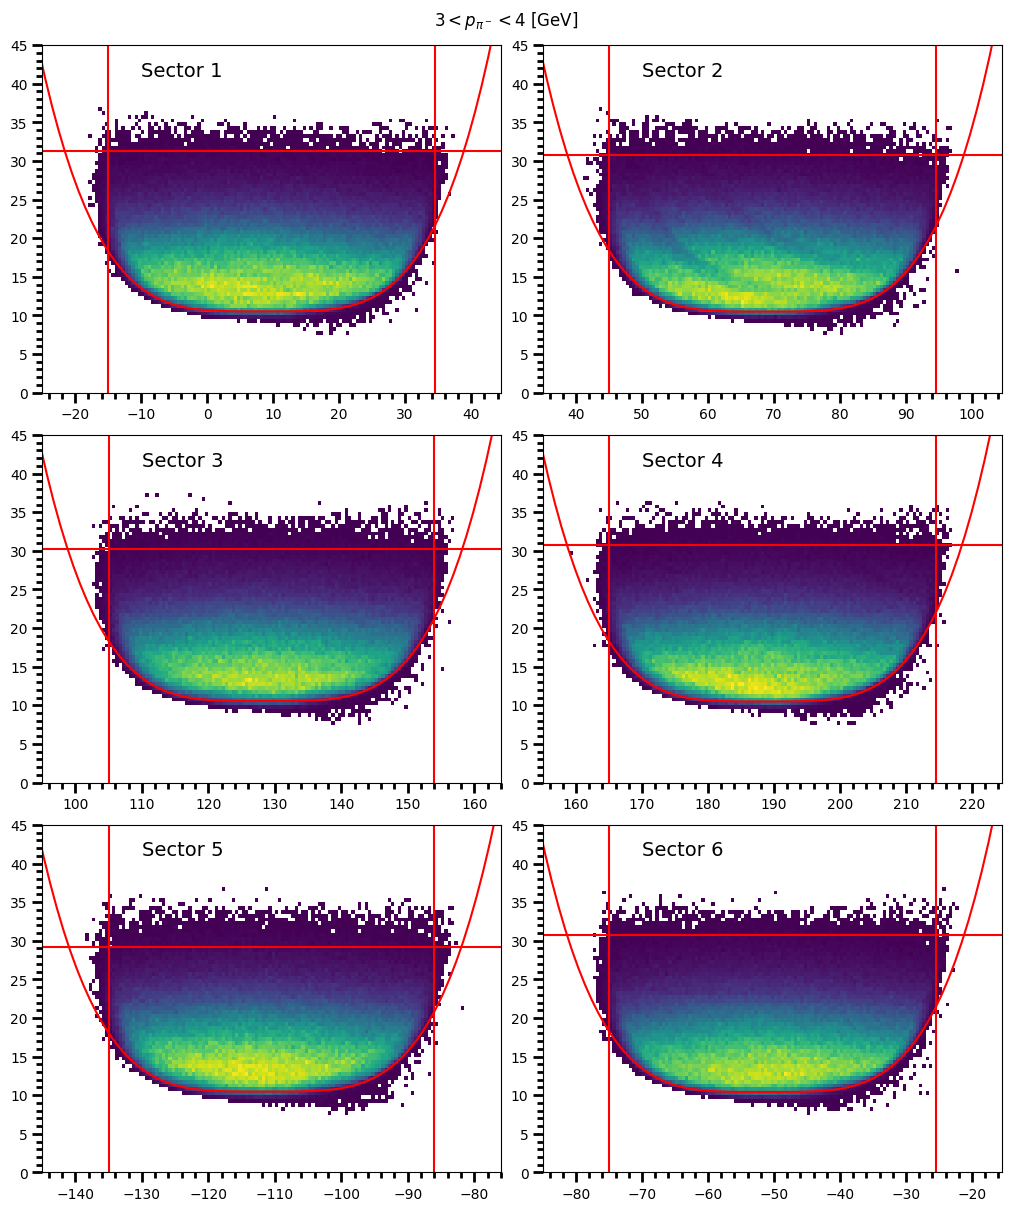

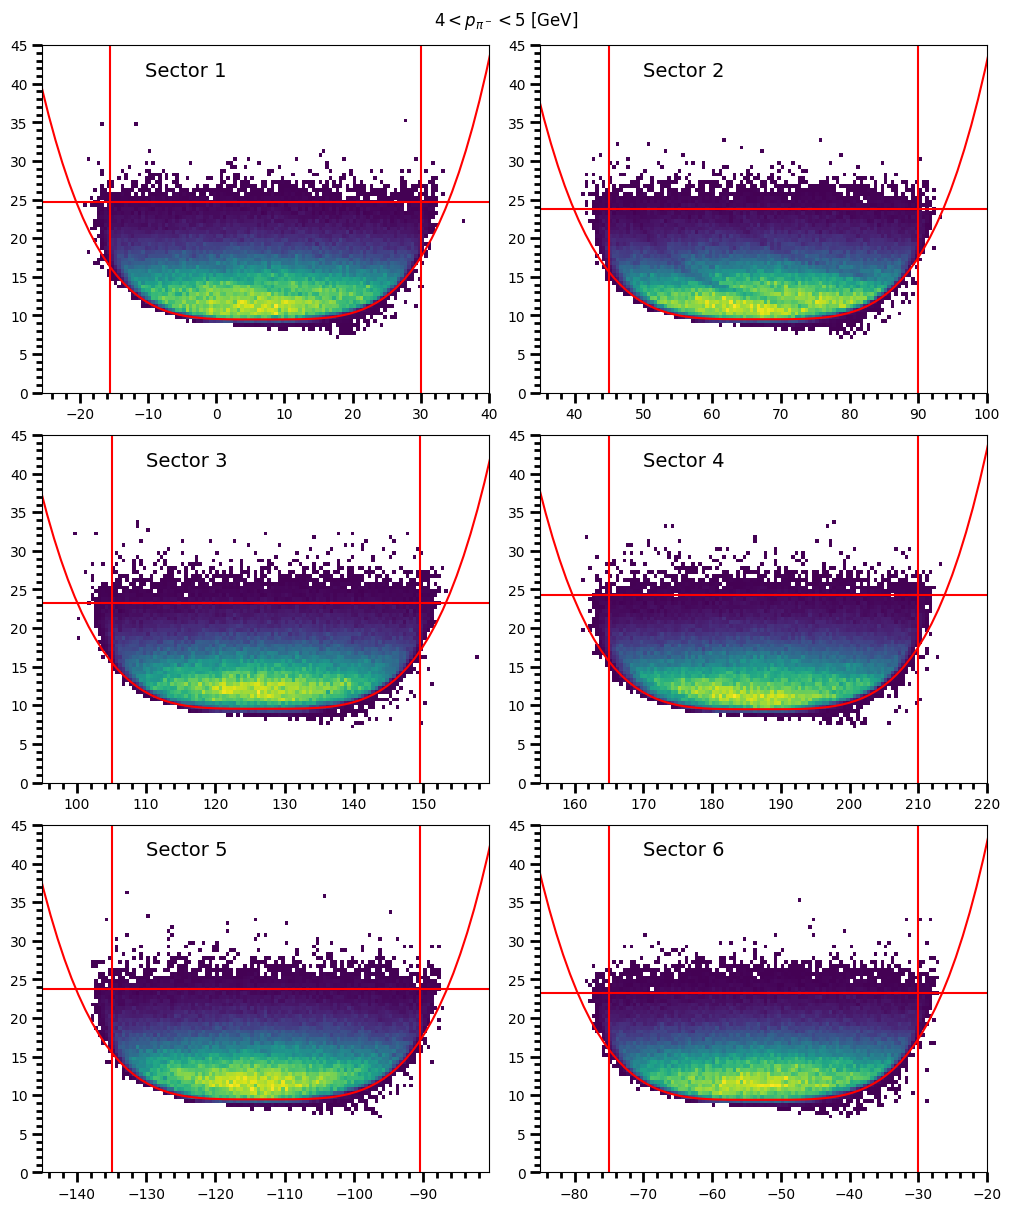

In [158]:
for i in range(1):
    hFile = uproot.open(tfile_hist[i])
    fFile = ROOT.TFile.Open(tfile_func[i])

    for i in range(3):
        par = par_list[i]
        nBins = 5
        if par == 'e':
            nBins = 10
        for p in range(nBins):
            fig, axs = plt.subplots(3, 2, figsize=(10,12), layout='constrained')  

            pMin = p
            pMax = p + 1

            fig.suptitle( rf'${pMin} < p_{par_tit[i]} < {pMax}$ [GeV]' )

            for sec in range(6):
                hist = hFile[hBase + f'_{sec}_bin_{p}_{par};1']
                func = fFile.Get( fBase + f'_{sec}_bin_{p}_{par};1')
                bounds = fFile.Get( vBase + f'_{sec}_bin_{p}_{par};1')
                
                make_plot( par, axs[math.floor(sec/2), sec%2], hist, func, bounds )
                axs[math.floor(sec/2), sec%2].text( bounds.X() + 5, 41, f'Sector {sec+1}', fontsize = 14)
            fig.show()
           